<a href="https://colab.research.google.com/github/zakaria-aabbou/Deep_Learning/blob/main/TP2/TP2_by_AABBOU_ZAKARIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
## Practical Deep Learning Tutorial with PyTorch - Tutorial N° 2

### 2020-2021

# Importing necessary libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, title, axis

# Useful Functions

You will need these 3 functions for this tutorial :

set_default to customize figure Layouts.

show_scatterplot draws a point cloud  𝑋  in 2-D, each data point has a specific color.

plot_bases shows an arrow along the x-axis in red and an arrow along the y-axis in green.

In [2]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

def show_scatterplot(X, title=''):
    plt.figure()
    x_min=-1.5
    x_max=1.5
    colors = (X-x_min)/(x_max-x_min)
    colors = (colors * 511).short().numpy()
    colors = np.clip(colors, 0, 511)
    colors= colors[:, 0]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    plt.title(title)
    plt.axis('off')
    
def plot_bases(bases, width=0.04):
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)

In [3]:
set_default()

PyTorch can run on both the CPU and GPU of a computer. 

The CPU is useful for sequential tasks, while the GPU is useful for parallel tasks.

You have to make sure your tensors and models are transferred to the device’s memory. This can be done with the following line of code:

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

This line creates a variable, called device, that is assigned to the GPU if one is available; otherwise, it defaults to the CPU.

# Data Generation

1. Create a tensor $X$ of 1000 instances in 2-D and sent it to the device’s memory.

In [5]:
n_points = 1000
X=torch.randn(n_points,2).to(device)

In [6]:
X.shape

torch.Size([1000, 2])

# Visualizing linear transformations

2. Visualise the original point cloud $X$ using the two functions above.

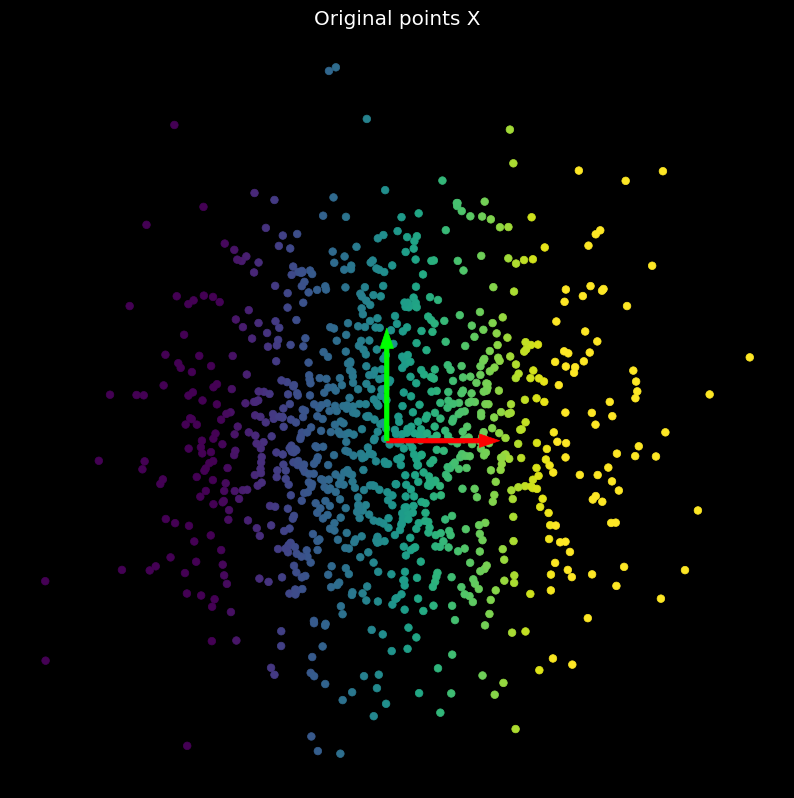

In [7]:
show_scatterplot(X, title='Original points X') 
OI = torch.cat((torch.zeros(2,2), torch.eye(2))).to(device)
plot_bases(OI)

#### 3. Explain briefly the Singular value decomposition (SVD)

SVD est une méthode de décomposion matricille valable pour toute matrice $W$ meme si elle rectangulaire, 
ce qui n'est pas le cas de la décomposition en valeurs propore qui n'est possible que pour les matrices 
carées et diagonalisables


La décomposition en valeurs singulières de la matrice $W$ de taille (m,n) est :    
$
\begin{equation}
    W = U
  \left[ {\begin{array}{cc}
   s_1  \,\,\, 0 \\
   0  \,\,\, s_2 \\
  \end{array} } \right]
  V^*
\end{equation}
$

1. $U$ est une matrice (m,m) unitaire, c-à-d elle vérifie : $U^*U=UU^*=I$,
    où $U^*$ est la matrice adjointe de U, c-à-d $U^* = {\overline {U}}^T$, 
    où ${\overline {U}}$ est la matrice conjugée de $U$.
    Si l'on considère que les matrices réelles (qui est le cas dans le TP), on aura : ${\overline {U}}=U$,
    est donc, dans le cas réél, les matrices unitaire sont exactement les matrices orthogonales ${U}^TU=U{U}^T=I$
    
2. Concernant la matrice au milieu : $\left[ {\begin{array}{cc}
   s_1  \,\,\, 0 \\
   0  \,\,\, s_2 \\
  \end{array} } \right]$, (en genrale c'est une matrice de taille m*n).
  C'est une matrice diagonale à valeurs positives rééls appelées les valeurs singuliers.
  

3. $V^*$ est une matrice unitaire de taille (n,n), et donc en cas réél c'est une matrice orthogonal comme $U$.

#### 4. Explain the relation between rotation and orthogonal matrices

La propriété principale des rotation est la conservation de caractère orthonormé direct des repères,
en calcule matriciel, ça se traduit par, le fait que la matrice d'une application linéaire qui conserve 
les angles et les distances (une isométrie vectorielle) doit être orthogonale, 
c'est-à-dire que son inverse est égale à sa transposée.

Du coup, les matrice  $U$ et $V^*$ dans la décomposition SVD de $W$ se sont deux matrices de rotation.

#### 5. Explain the relation between scaling and diagonal matrices

Une matrice diagonale est une matrice de (scaling) qui peut etre soit un agrandissement si les valeurs singulieres $s_i$ 
sont supérieures à $1$, ou une réductions si les valeurs singulieres $s_i$ sont inférieurs à 1.

#### 6. Compute 10 linear transformations suing several random matrices $W$ of size (2,2).

For each transformation, compute the SVD of W, and visualize the transformed point cloud $Y$ with its corresponding singular values $(s_1,s_2)$.


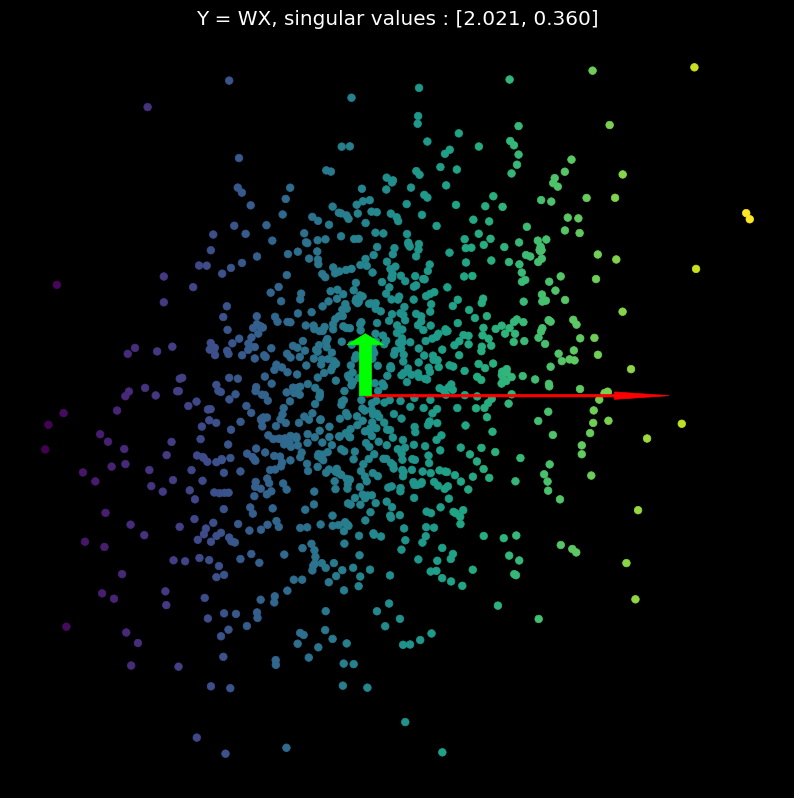

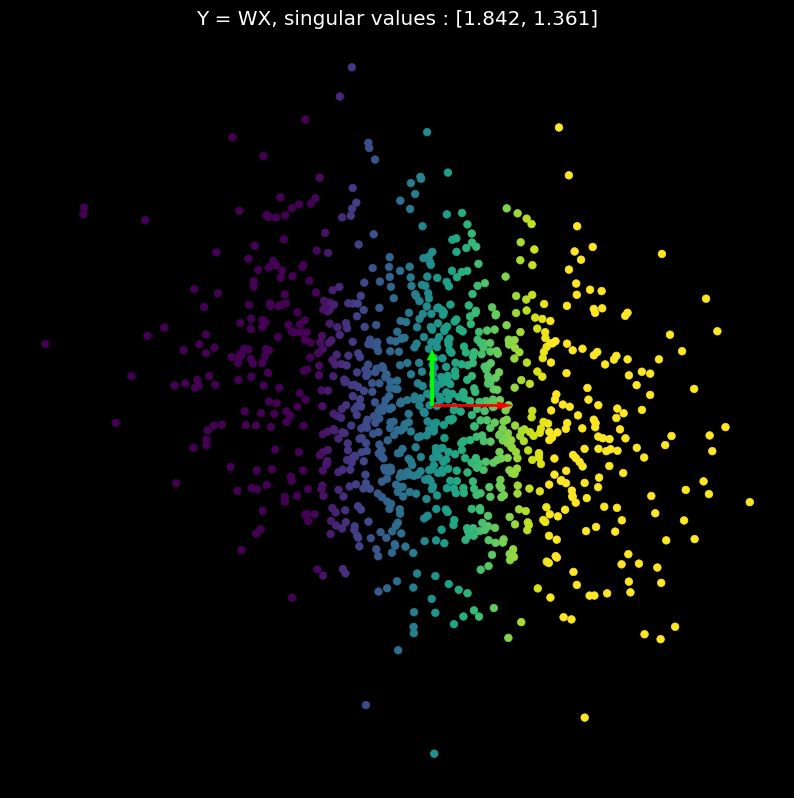

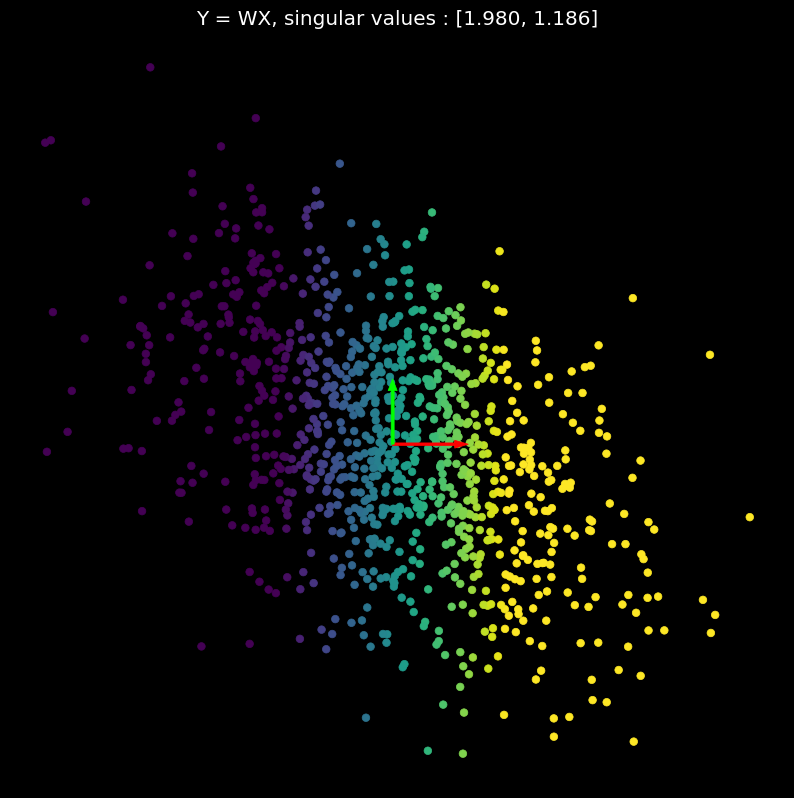

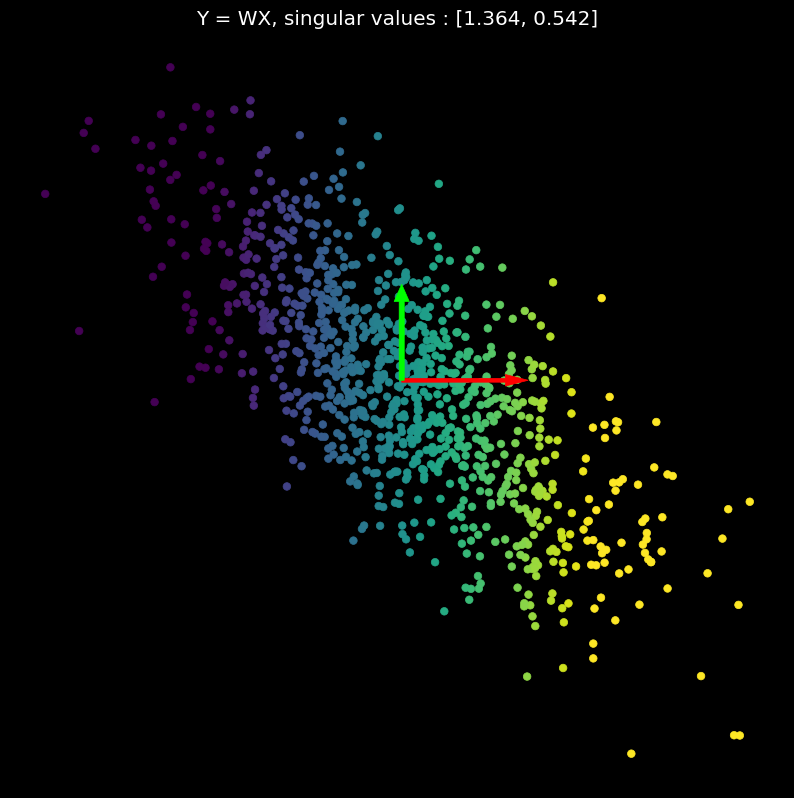

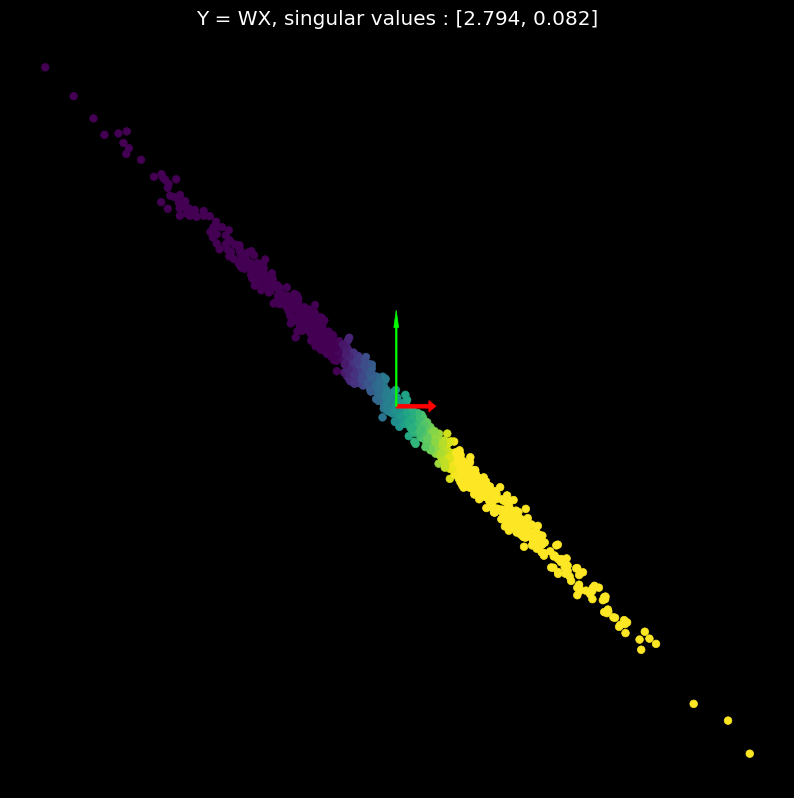

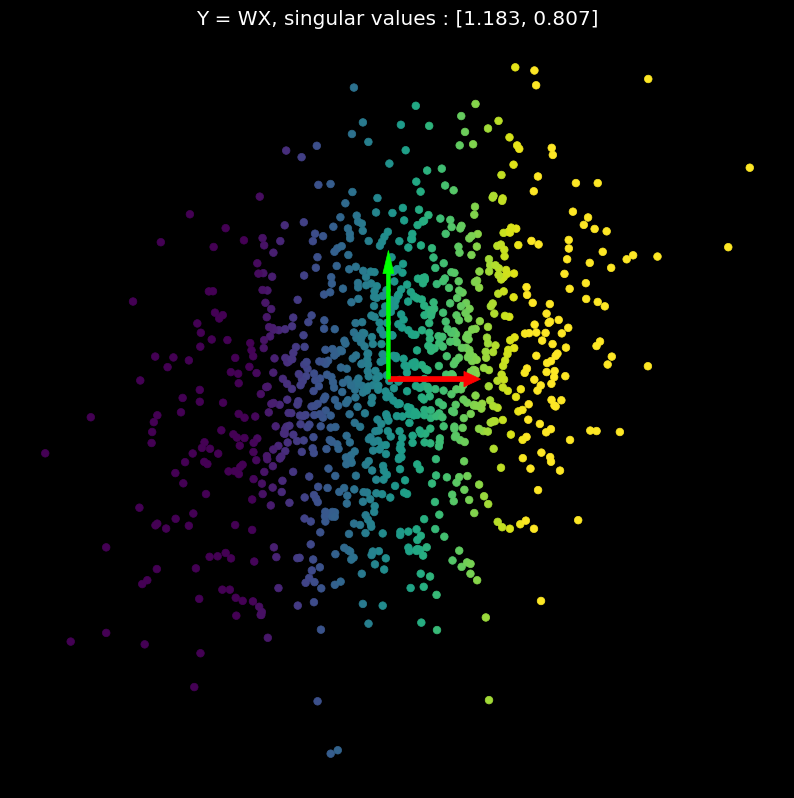

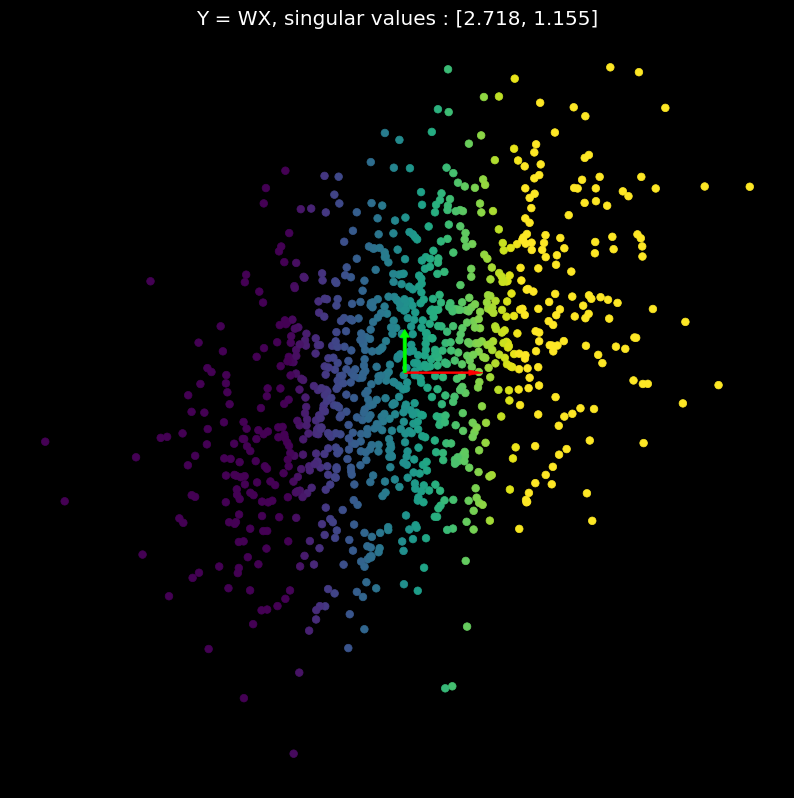

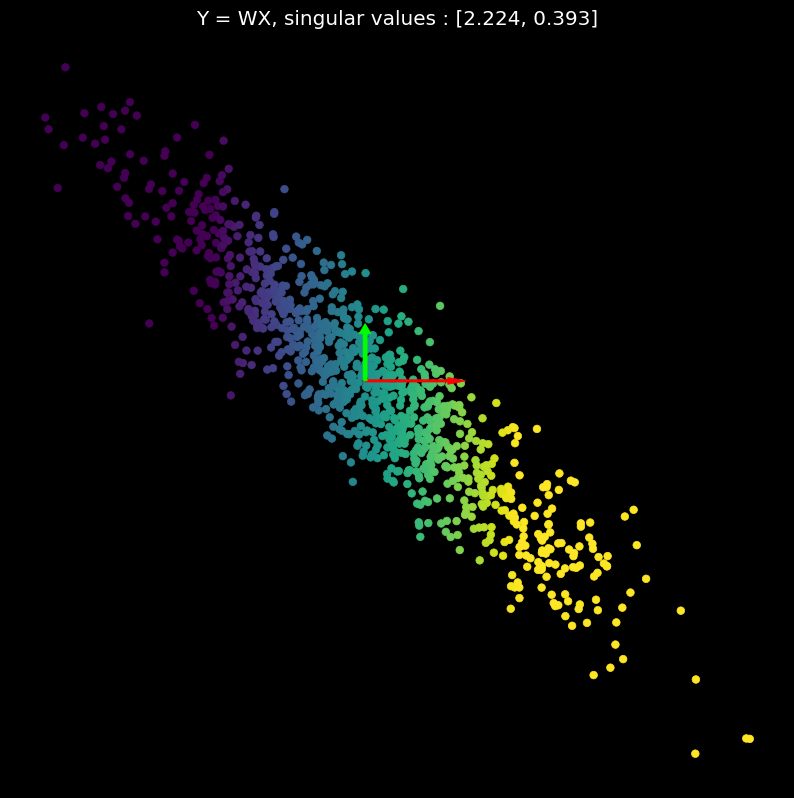

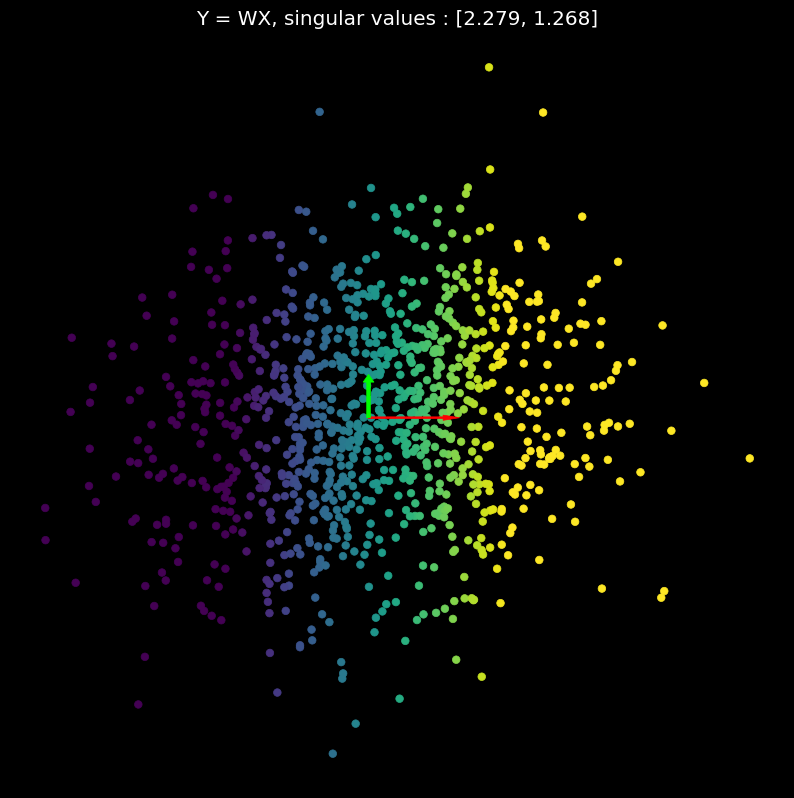

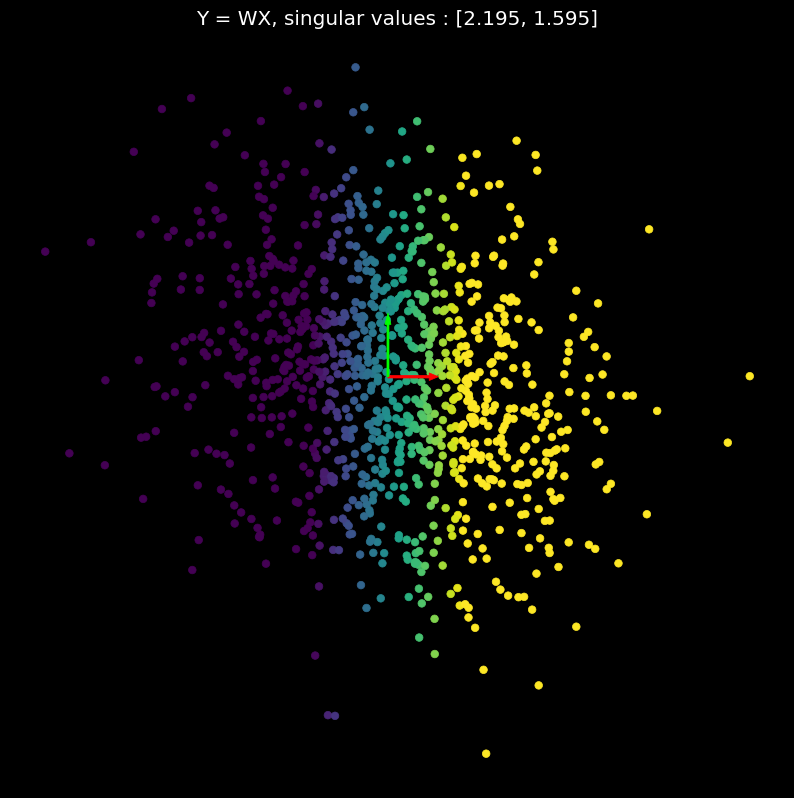

In [8]:
for i in range(10): 
    W = torch.randn(2, 2).to(device)  
    Y = X @ W.t() # Pour transformer les points, c'est équivalent à : Y = torch.matmul(W,X.t()).t()
    U, S, V = torch.svd(W)     
    show_scatterplot(Y,  title='Y = WX, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1])) 
    plot_bases(OI) 

#### 7. Analyse the results.

Le nuage de points original est sous forme de cercle, 
le transformer par un scaling ça va le rendre sous forme d'un ellipse.

Les valeurs singulières $s_i$ (affichées sur chaque figure en haut)
correspondent aux longueurs des grand et petit axes de l'ellipse.


Si la veleur $s_i$ est plus grande que 1 c'est un étirement suivant l'axe correspondnat, sinon c'est une réduction,
il faut montrer ça sur les figures.


Si sur une figure on voit que le nuage transformé a gardé son aspect cerculaire, ca doit etre du aux valeurs singulieres qui
sont proches de 1 (au moins suivant un axe), est donc y'a pas vraiment de scaling, la matrice du mileu est presque la matrice 
identité, qui est neutre, i.e. ne fait aucune transformation.

Il faut aussi regarder dans chaque nuage transformé, si l'ordre des couleurs du nuage a changé ou non.
si il y'a conservation du de l'ordre (le sens d'une rotation est contraire aux aiguilles de la montre) alors 
le determinant est positif, si il y'a une modifiction du sens, c'est une reflection est donc le determinanat de la matrice est negatif.


# Linear transformation with PyTorch’s nn.Linear class.

#### 8. Compute a similar linear transformation with PyTorch’s nn.Linear class and visualize the transfomed point cloud $Y$.

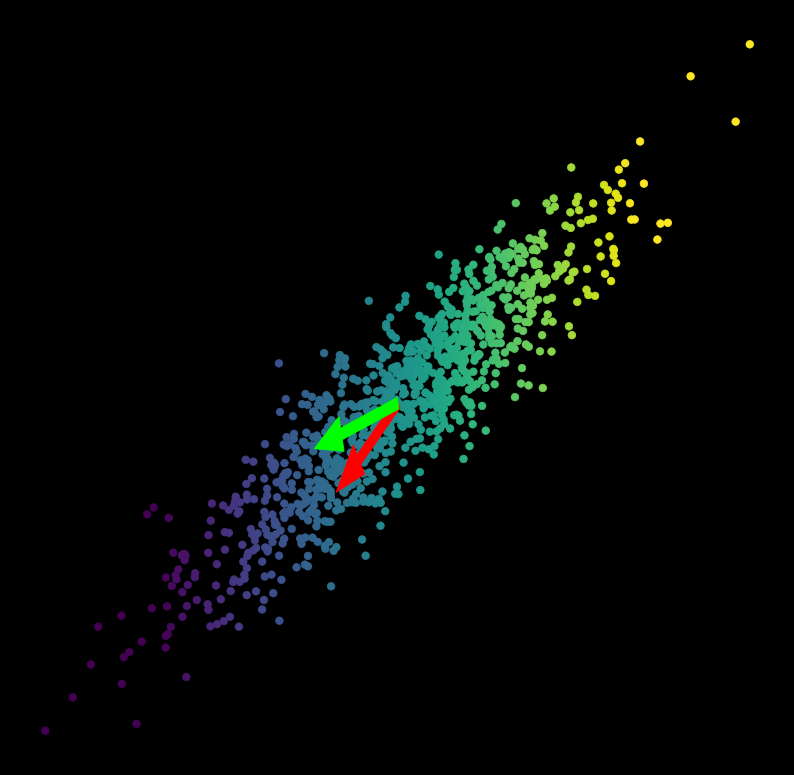

In [9]:
model = nn.Sequential(
        nn.Linear(2, 2, bias=False))
model.to(device)
with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y)
    plot_bases(model(OI))

# Non-linear transformations

#### 9. Plot the graph of the hyperbolic tangent function (tanh). What do you notice about it ?

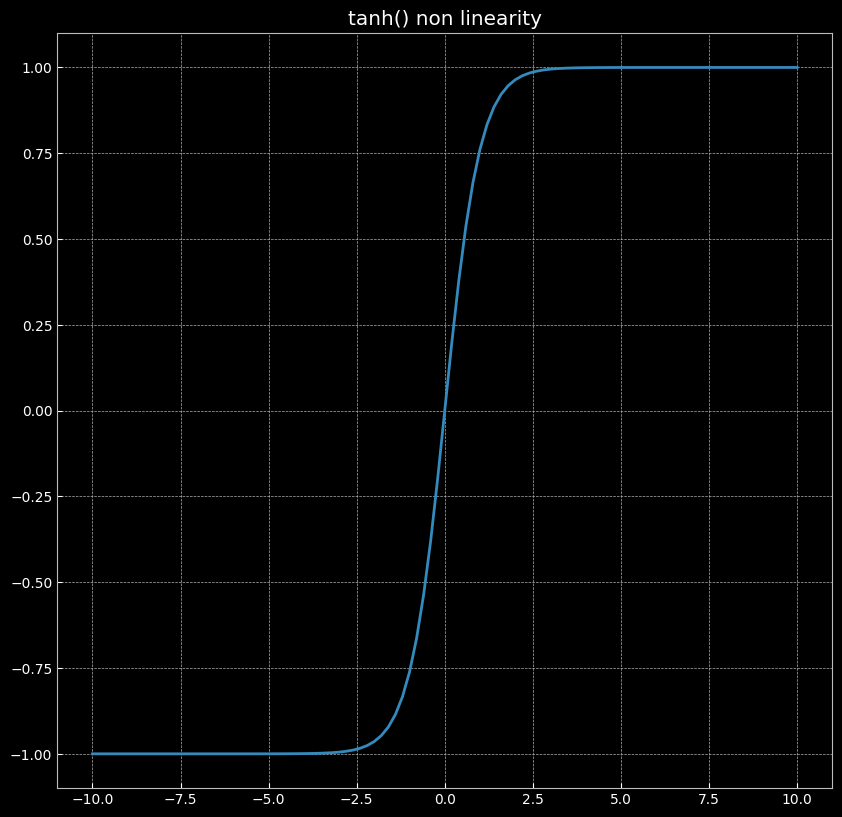

In [10]:
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plot(z.numpy(), s.numpy())
title('tanh() non linearity');

Les images par la fonction tanh sont comprises entre -1 et 1 pour les valeurs entre -2.5 et 2.5, 
à droite de cet intervalle toute valeur a pour image -1
et à gauche de cet intervalle toute valeur a pour image 1

#### 10. For s=1,...,5. Compute a linear transformation with PyTorch’s nn.Linear class (the transformation matrix must be a $2*2$ diagonal matrix, with diagonal elements all equal to s), followed by a non-linear transformation using tanh. Visualise the results.

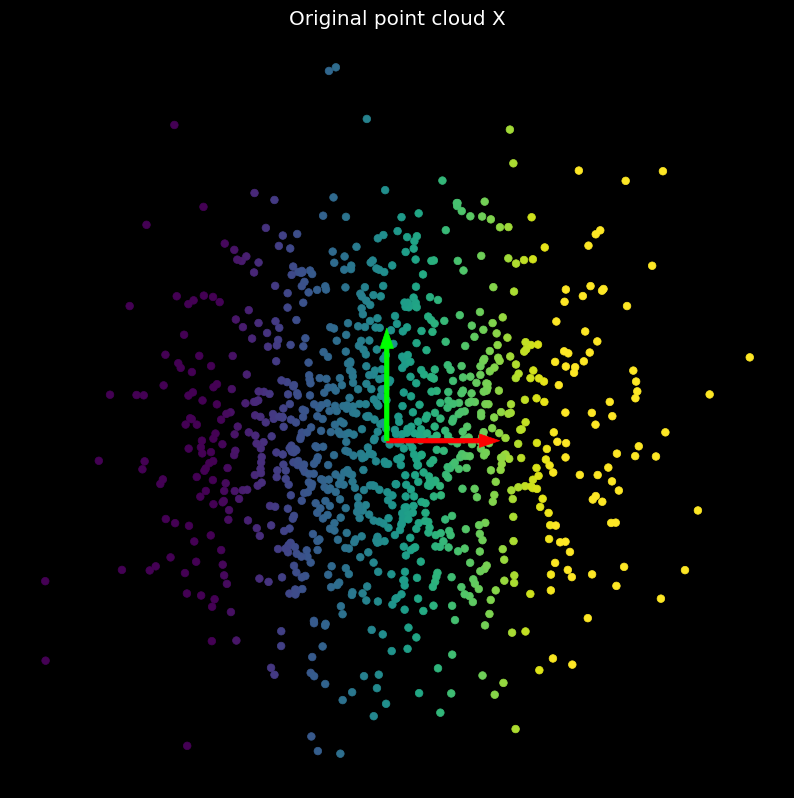

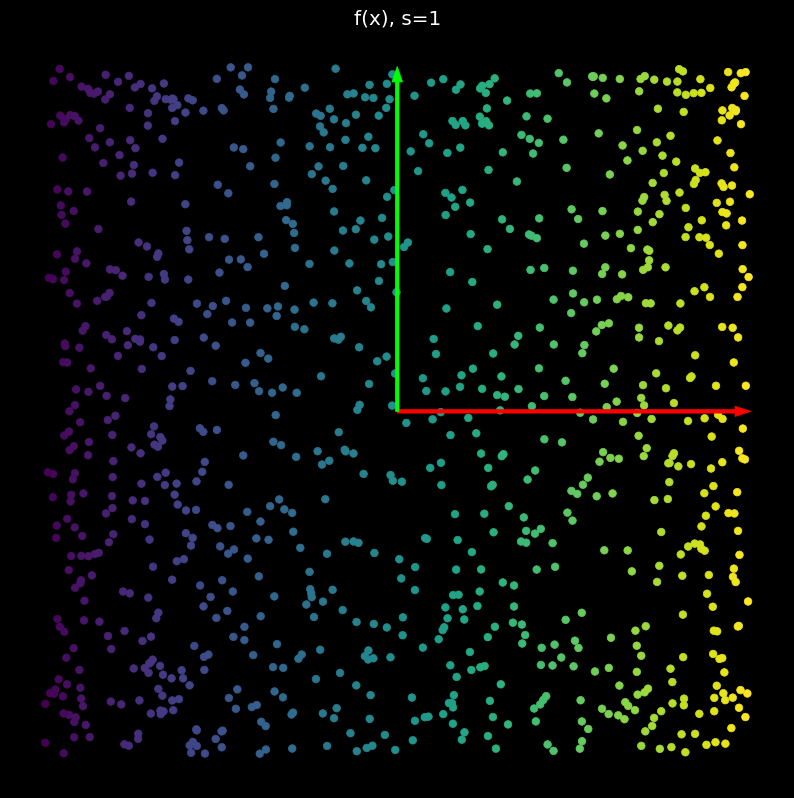

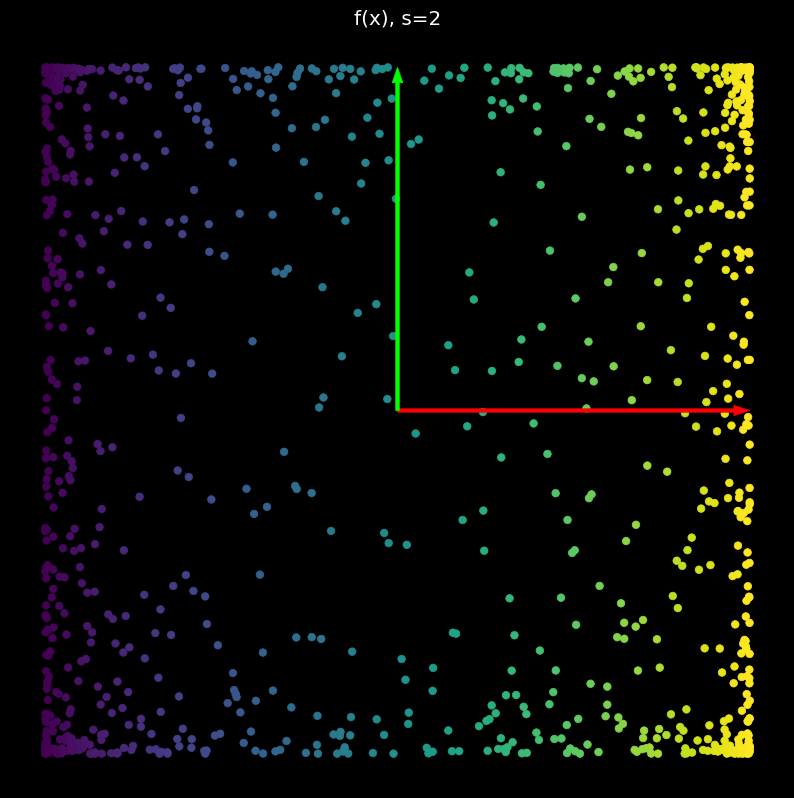

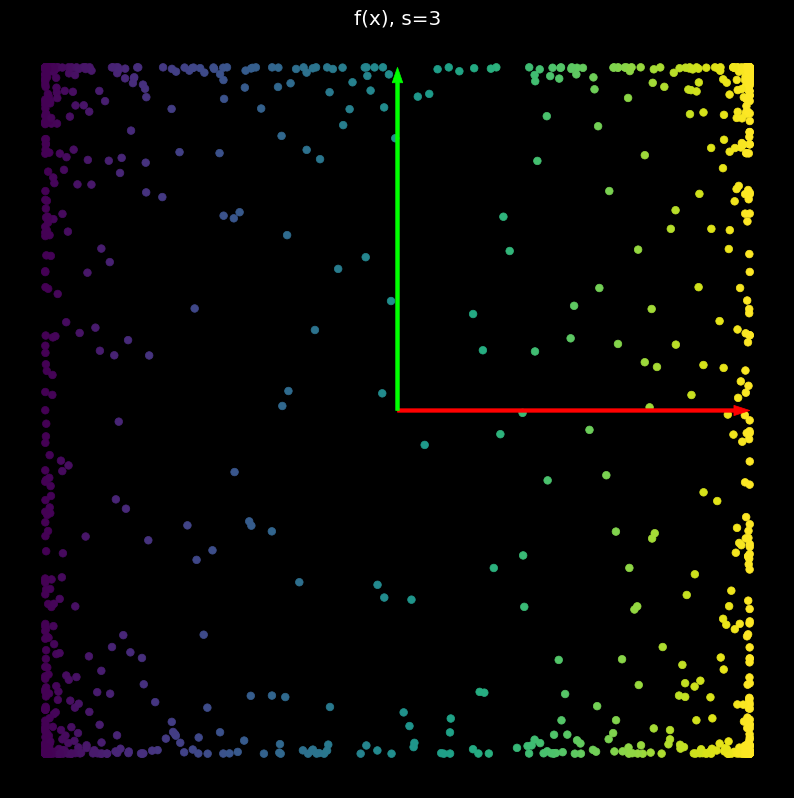

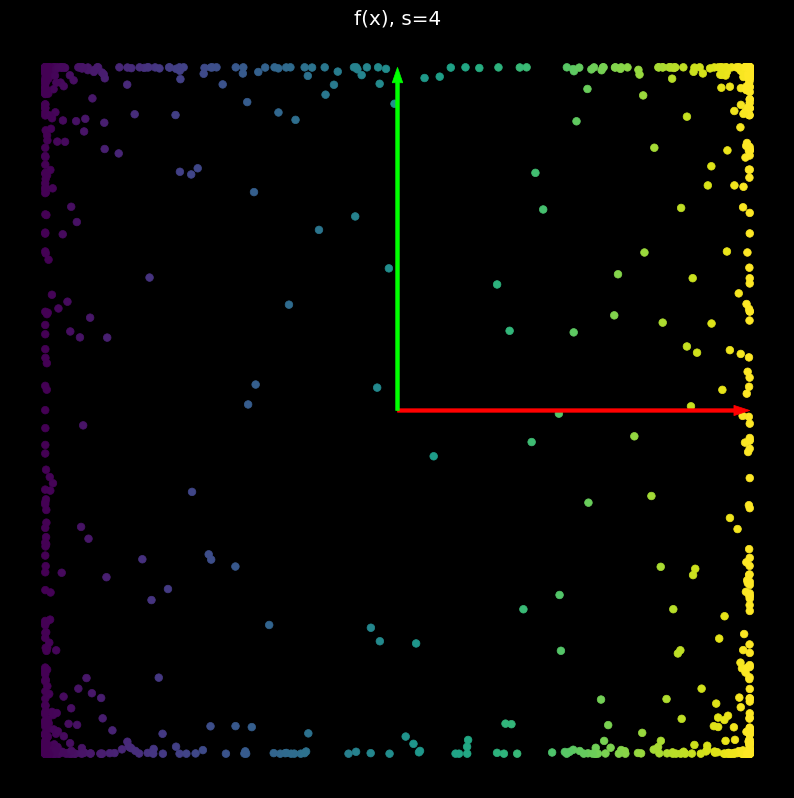

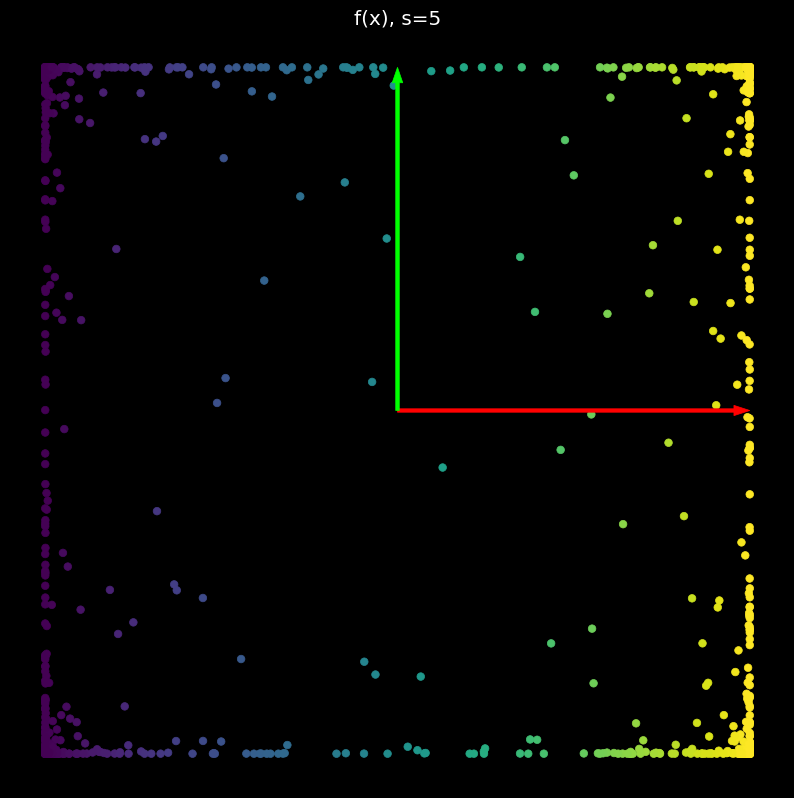

In [11]:
show_scatterplot(X, title='Original point cloud X')
plot_bases(OI)

model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh())
model.to(device)

for s in range(1,6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W) 
    Y = model(X).data
    show_scatterplot(Y, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

#### 11. Analyse the results
    

On a transformé le nugae du point circulaire en un carré, pourquoi ?


D'abord le modele fait une transformation lineaire qu'on a forcé à etre juste un scaling et donc pas de rotations.

on fixe nous meme les valurs digonales de cette matrice de scaling, une fois remlies 
des 1, puis 2, 3, 4 et enfin par des 5.

C'est toujours des velurs plus grandes que 1, donc il y'a toujours une dilatation et pas une réduction.

L'effet de cette dilatation ou augmentation : élargir les valeurs de la matrice X et les pousser 
à sortir de l'intervalle (-2.5,2.5) et comme ca, si on applique la fonction tanh, il vont avoir comme image -1 ou 1
et ils vont bouger vers les bors du carrées qu'on voit sur les figures.

cet effet s'accentue avec l'augmentation de la valeur de $s$, plus $s$ est grande plus, 
la transformation lineaire pousse bcp de points à avoir des images en dehors de l'intervalle (-2.5,2.5) 
et donc d'etre poussé ensuite vers les bords du carré

cela explqiue le fait que avec $s=1$ (pas de transformation car c'est la matrice unité),
il y'a bcp de données  au mileu du carée, car la transformation lineaire au debur n'a rien fait
c'est la tanh, qui a poussé les velurs deja en dehors de (-2.5,2.5) vers les bords du carré, les autres ont resté au mileu.

# Transformations performed by a random neural net

#### 12. Compute the Network transformation consisting of a linear layer, which performs an affine transformation, followed by a hyperbolic tangent non-linearity, and finally another linear layer

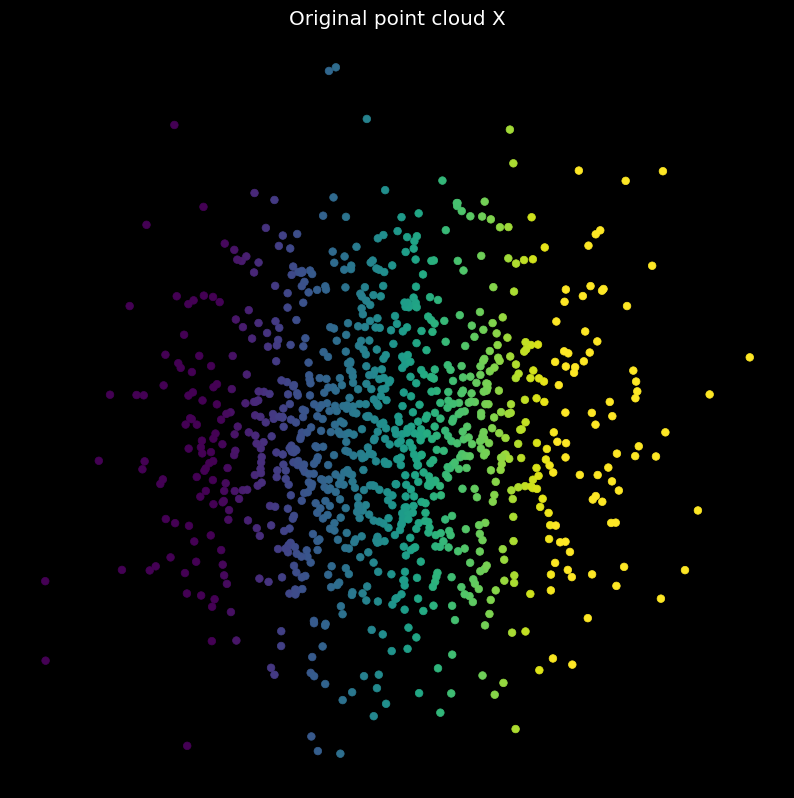

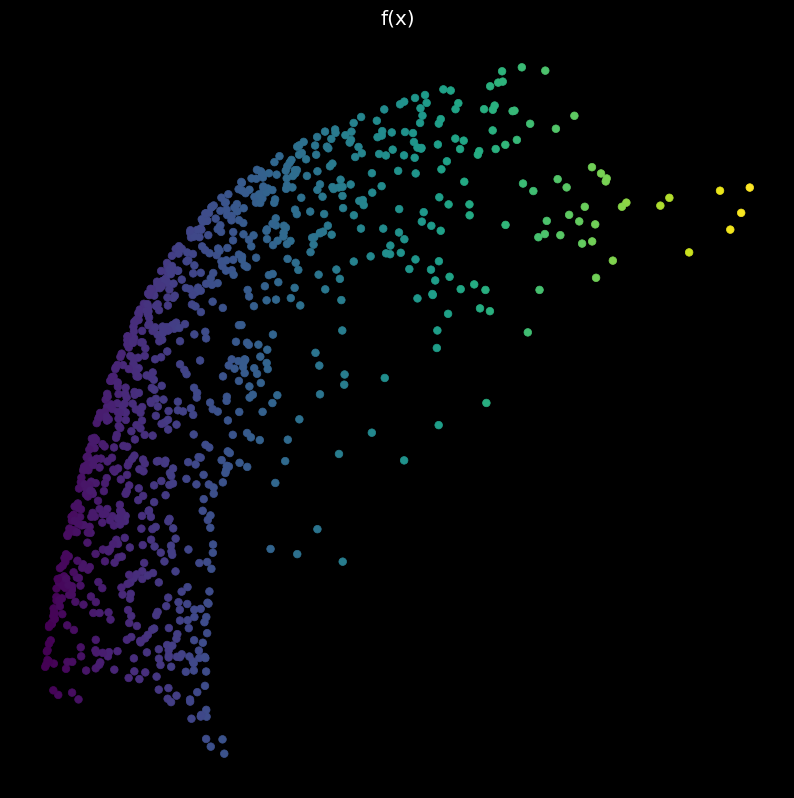

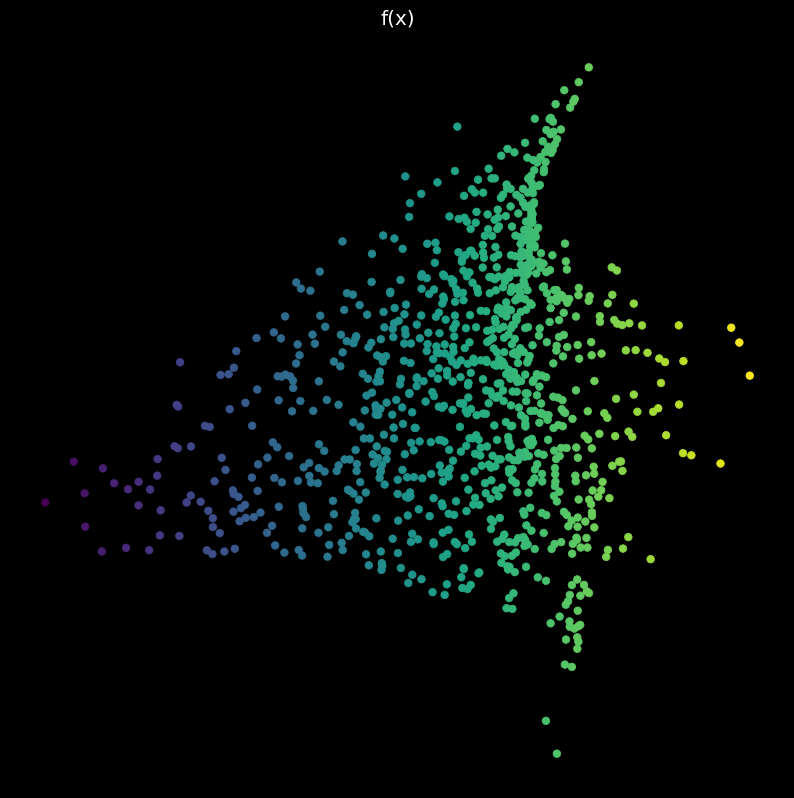

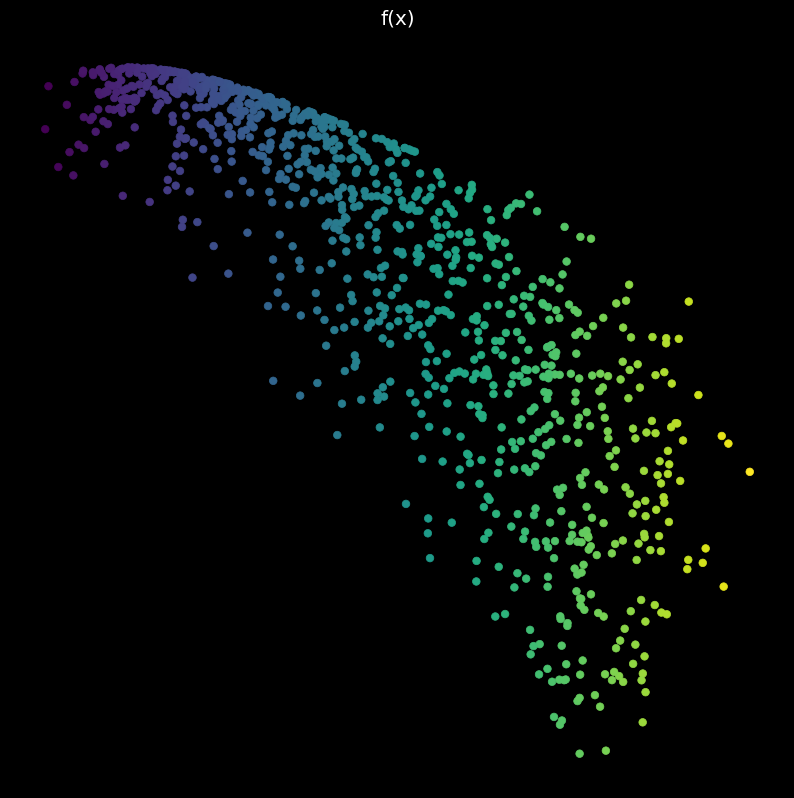

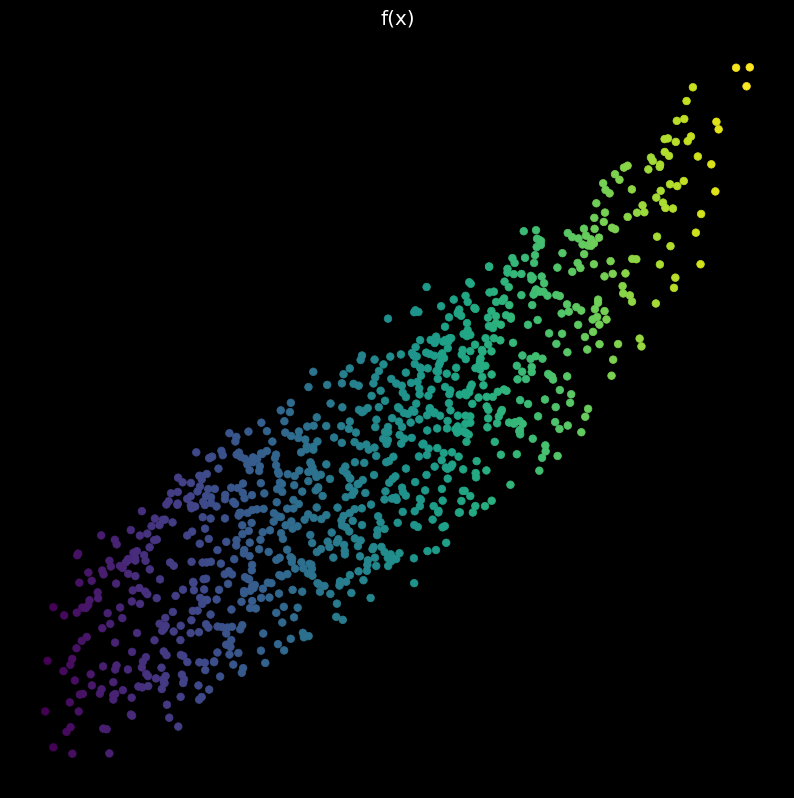

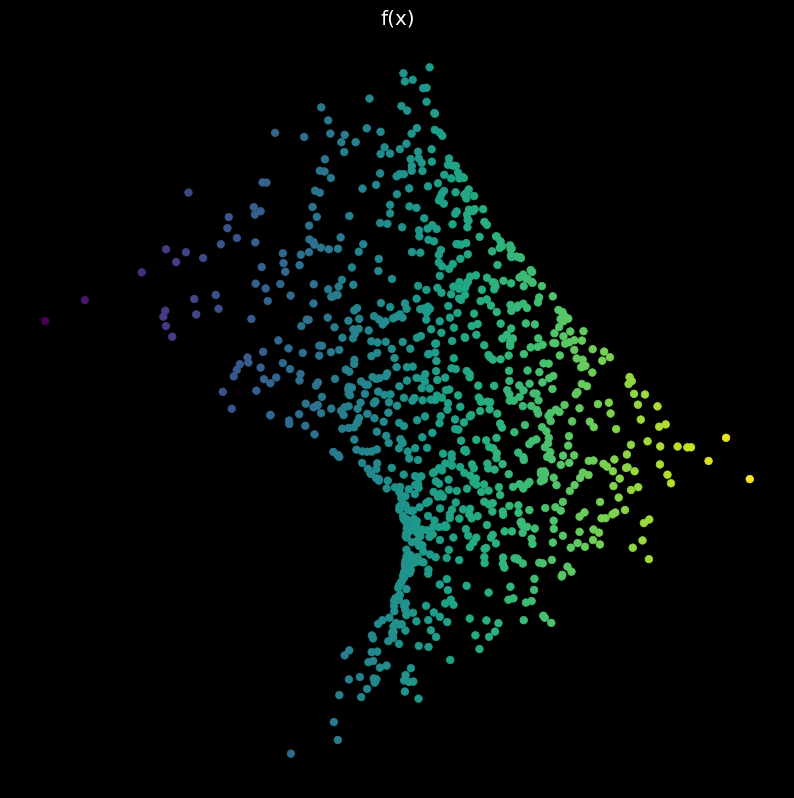

In [12]:
show_scatterplot(X,  title='Original point cloud X')
n_hidden = 5
NL = nn.Tanh()  
for i in range(5):
    # creer un "1-layer nn" avec des poids aleatoires
    model = nn.Sequential(
            nn.Linear(2, n_hidden),  # Appliquer une transformation affine de 2 à 5
            NL,                      # Aplliquer tanh
            nn.Linear(n_hidden, 2)   # Appliquer une transformation affine de 5 à 2
        )
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, title='f(x)')  

#### 13. Answer to the above question using a deeper neural network

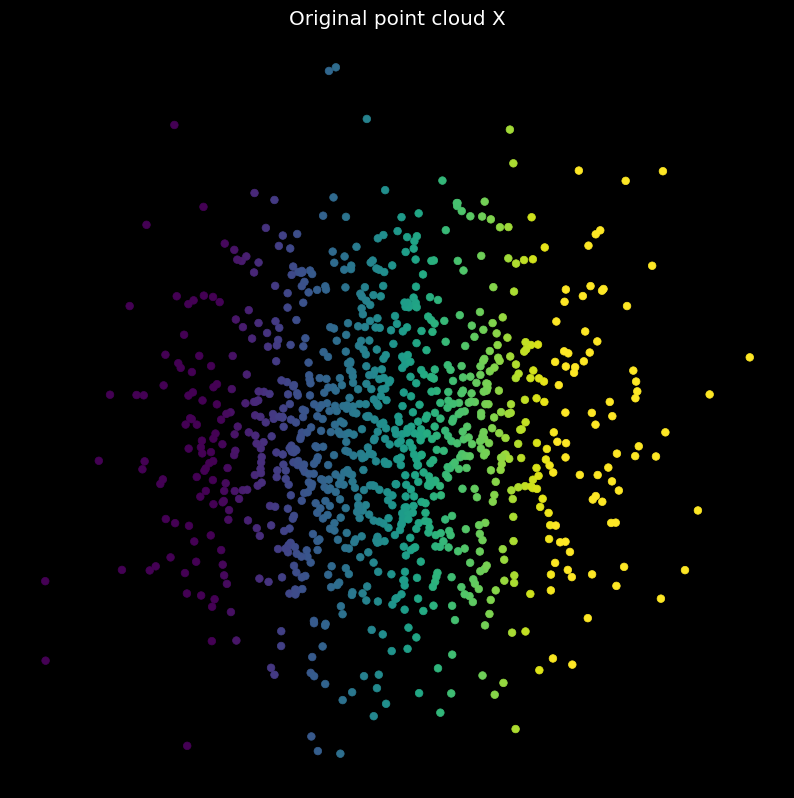

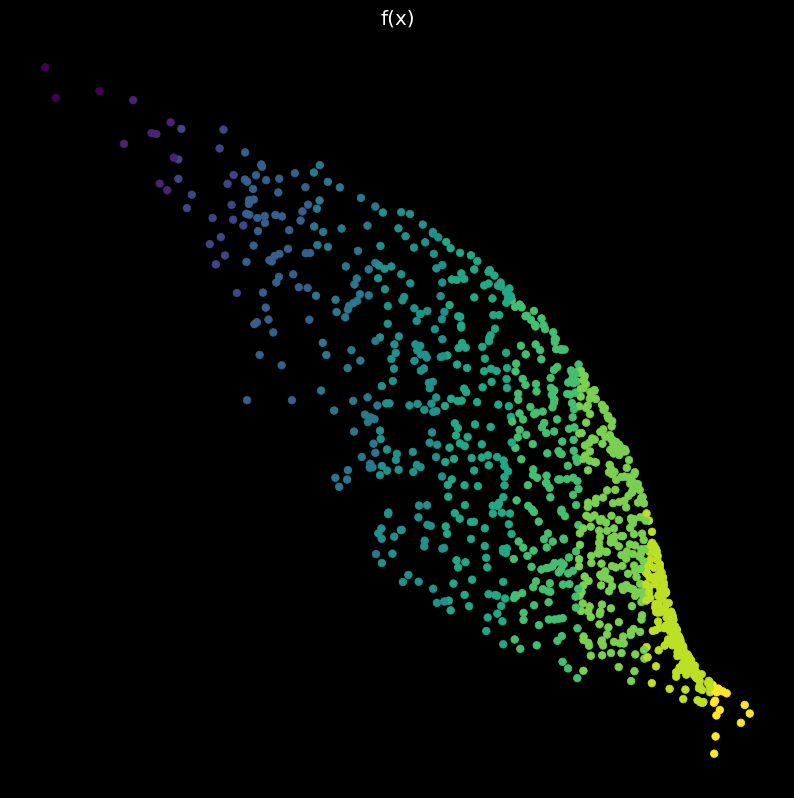

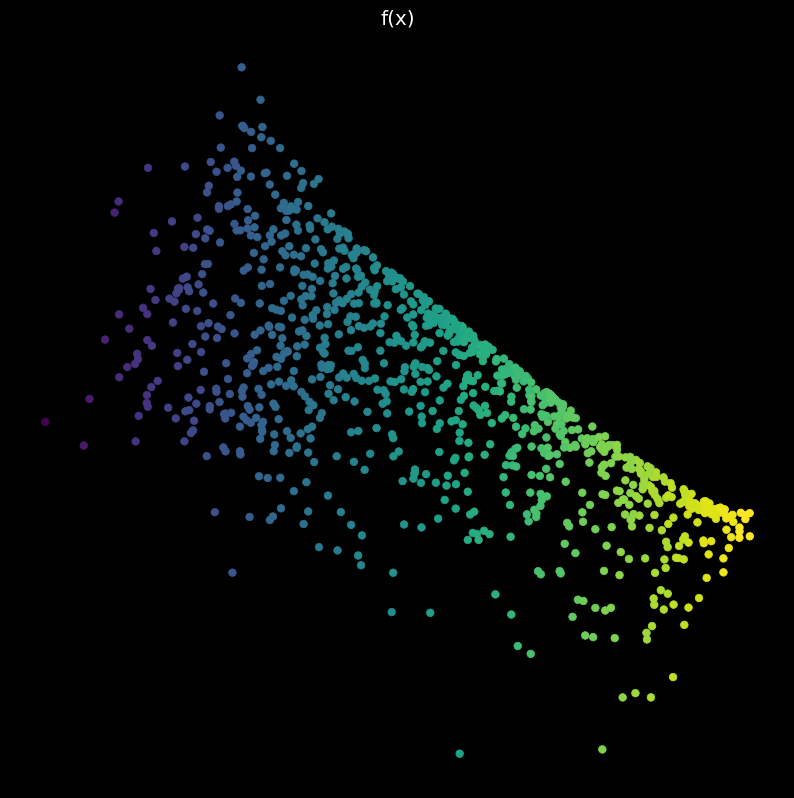

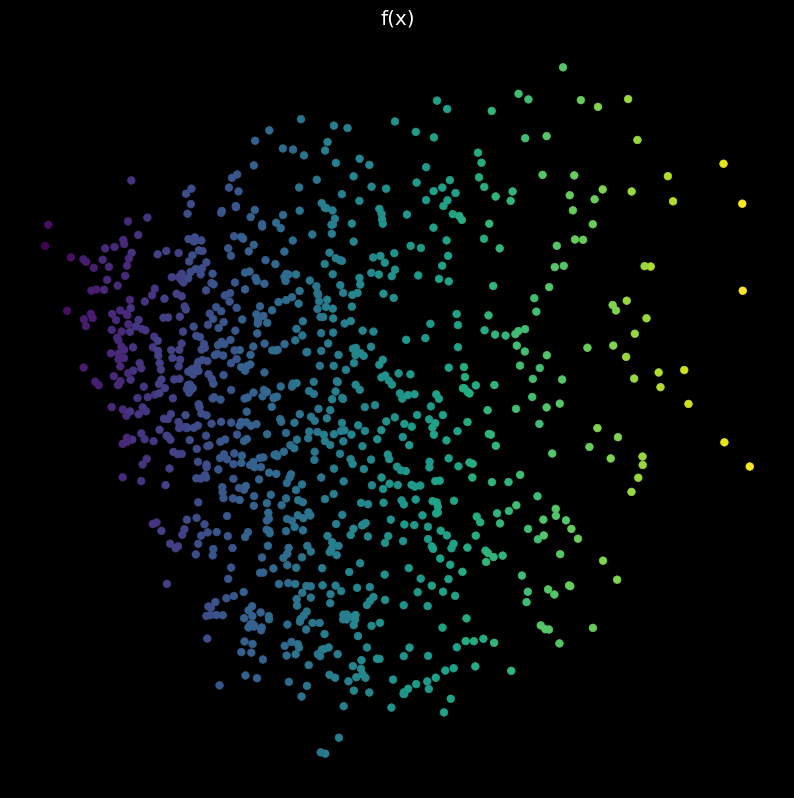

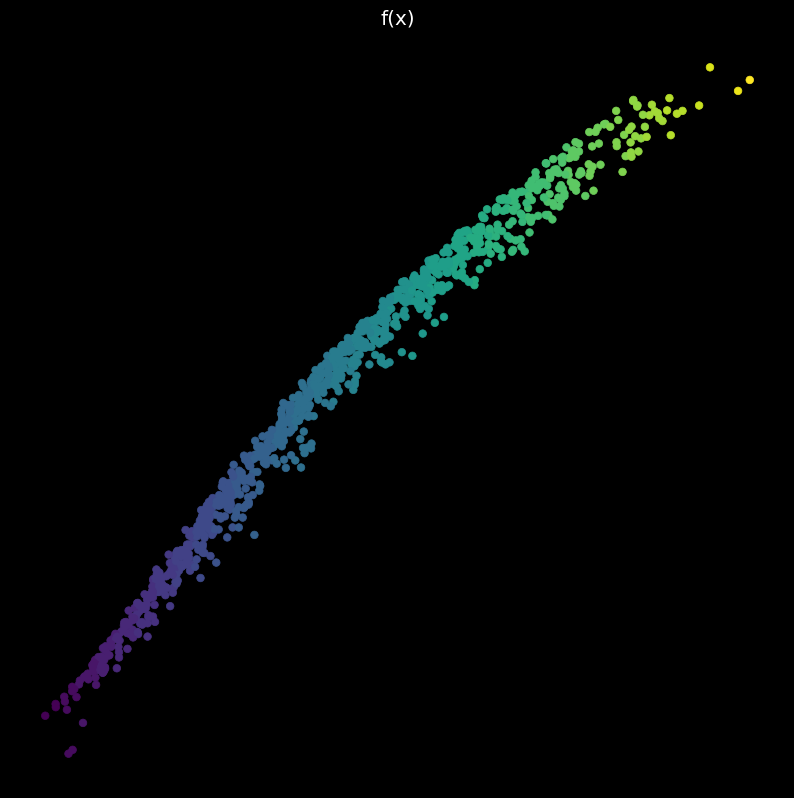

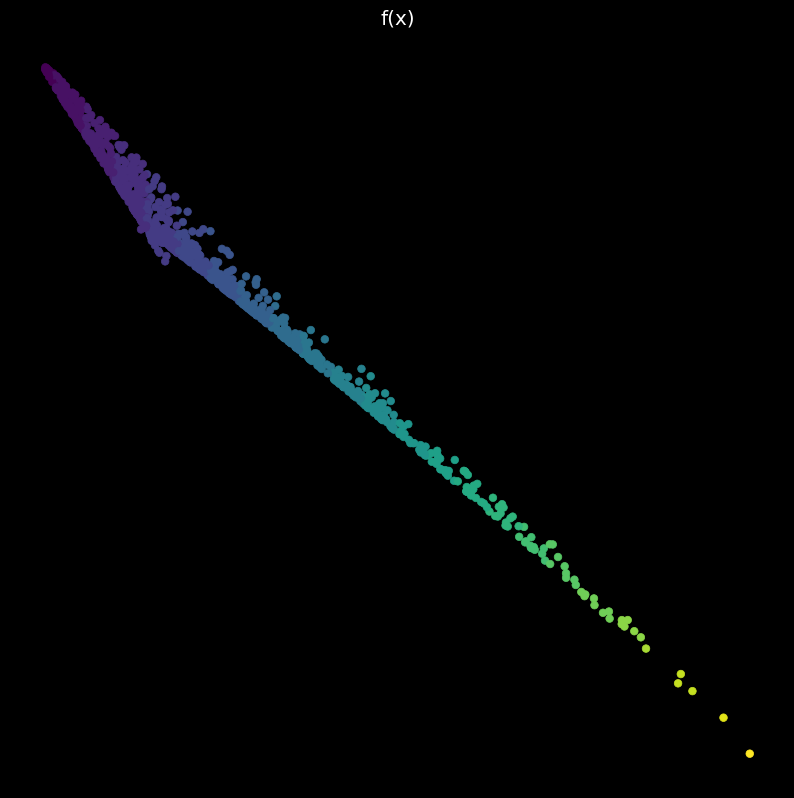

In [13]:
show_scatterplot(X, title='Original point cloud X')
n_hidden = 5
NL = nn.Tanh()
for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, title='f(x)')